In [1]:
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

data = pd.read_csv('results/final_responses_bourdieu.csv') # responses from Mistral-Instruct
#data = data.fillna("None")

# Creating a function that extracts 'category_1' values and returns 'mistake' if there's an error in the process.
def extract_category_1(data, cat = 'category_1'):
    category_1_values = []
    for item in data:
        try:
            # Extracting the 'category_1' value, assuming well-formed input data
            start = item.find(f"'{cat}': '") + len(f"'{cat}': '")
            end = item.find("'", start)
            category_value = item[start:end]
            
            # Append 'mistake' if the extracted value is not valid (empty or not found)
            if category_value:
                category_1_values.append(category_value)
            else:
                category_1_values.append('mistake')
        except Exception as e:
            # Append 'mistake' in case of any exception during extraction
            category_1_values.append('mistake')
    return category_1_values


extracted_values = extract_category_1(data['answser'], cat = 'category_1')
extracted_values_2 = extract_category_1(data['answser'], cat = 'category_2')

data['category_1_model'] = extracted_values
data['category_2_model'] = extracted_values_2


test = data[data['category_1_model'].isin(['leisure', 'work', 'None'])]
test.category_1_model.value_counts()

test_2 = data[data['category_2_model'].isin(['future', 'past', 'None'])]
test_2.category_2_model.value_counts()


category_2_model
future    2726
past      1203
None        67
Name: count, dtype: int64

In [2]:
test_2.category_2_model.value_counts()

category_2_model
future    2726
past      1203
None        67
Name: count, dtype: int64

In [3]:
import pandas as pd
import numpy as np

df_bourdieu = pd.read_csv('results/bourdieu.csv', index_col=[0]) # original results
df_bourdieu['len_content'] = df_bourdieu['content'].apply(lambda x: len(x.split(' ')))
#df_bourdieu = df_bourdieu.dropna()
#df_bourdieu = df_bourdieu.fillna("None")
#df_bourdieu = df_bourdieu.dropna()



x_values = df_bourdieu["leisure_work"].values
y_values = df_bourdieu["future_past"].values

distances = np.sqrt(x_values**2 + y_values**2)
df_bourdieu['distance'] = distances


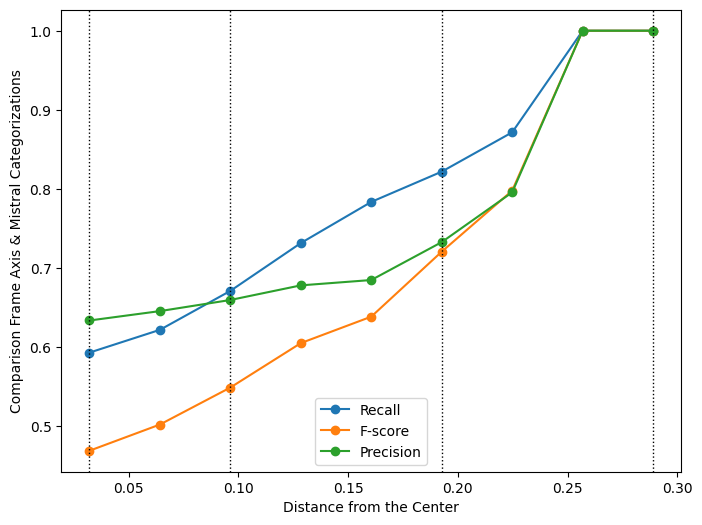

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

list_accuracy = []
list_recall = []
list_fscore = []
list_precision = []
radius_distance = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#radius_distance = [0.1]
circle_radius_list = []
for rad in radius_distance:
    circle_radius = max(x_values) * rad
    circle_radius_list.append(circle_radius)

    df_bourdieu_1 = df_bourdieu[df_bourdieu['distance'] >= circle_radius]
    #df_bourdieu_1 = df_bourdieu.copy()
    #df_bourdieu_1['category_1'][df_bourdieu_1['distance']> circle_radius] = 'None'
   
    df_bourdieu_1 = pd.merge(df_bourdieu_1, test[['doc_id', 'category_1_model']], on='doc_id')
    df_bourdieu_1 = df_bourdieu_1[df_bourdieu_1['category_1']!='None']
    df_bourdieu_1 = df_bourdieu_1[df_bourdieu_1['category_1_model']!='None']


    y = list(df_bourdieu_1['category_1'])
    y_pred = list(df_bourdieu_1['category_1_model'])

    acc = accuracy_score(y, y_pred)
    list_accuracy.append(acc)

    report = classification_report(y, y_pred, output_dict=True)
    list_recall.append(report['macro avg']['recall'])
    list_fscore.append(report['macro avg']['f1-score'])
    list_precision.append(report['macro avg']['precision'])

# Now list_accuracy, list_recall, and list_fscore contain accuracy, recall, and F-score respectively for each radius_distance value.

import matplotlib.pyplot as plt

# Assuming you have imported your data into a DataFrame called 'data'

# Plotting
plt.figure(figsize=(8, 6))
#plt.plot(circle_radius_list, list_accuracy, marker='o', linestyle='-', label='Accuracy')
plt.plot(circle_radius_list, list_recall, marker='o', linestyle='-', label='Recall')
plt.plot(circle_radius_list, list_fscore, marker='o', linestyle='-', label='F-score')
plt.plot(circle_radius_list, list_precision, marker='o', linestyle='-', label='Precision')


plt.axvline(x= max(x_values) * 0.1, color='black', linewidth=1, linestyle=':')  # Draw a vertical line at x=0


plt.axvline(x=max(x_values) * 0.3, color='black', linewidth=1, linestyle=':')  # Draw a vertical line at x=0


plt.axvline(x=max(x_values) * 0.6, color='black', linewidth=1, linestyle=':')  # Draw a vertical line at x=0

plt.axvline(x=max(x_values) * 0.9, color='black', linewidth=1, linestyle=':')  # Draw a vertical line at x=0


plt.xlabel('Distance from the Center')
plt.ylabel('Comparison Frame Axis & Mistral Categorizations')
plt.title('')
plt.legend()
plt.grid(False)
plt.savefig("results/work-leisure_comparison.png")
plt.show()

/home/charles/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/charles/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/charles/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


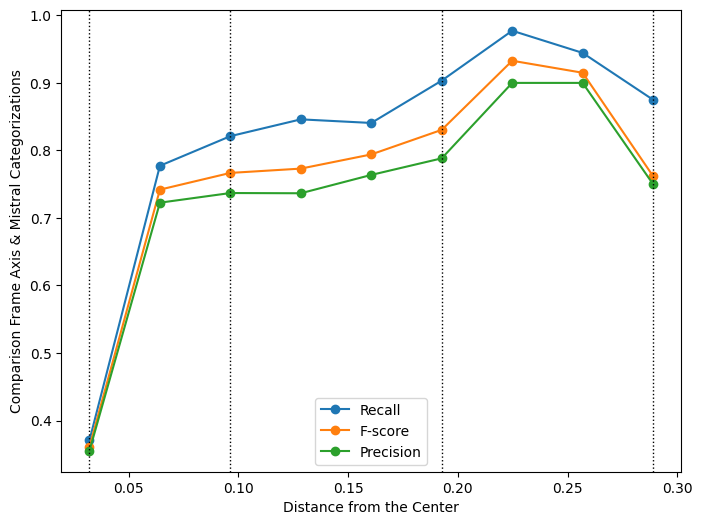

In [16]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

list_accuracy = []
list_recall = []
list_fscore = []
list_precision = []
radius_distance = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#radius_distance = [0.1]
circle_radius_list = []
for rad in radius_distance:
    circle_radius = max(x_values) * rad
    circle_radius_list.append(circle_radius)

    df_bourdieu_1 = df_bourdieu[df_bourdieu['distance'] >= circle_radius]
    #df_bourdieu_1 = df_bourdieu.copy()
    #df_bourdieu_1['category_1'][df_bourdieu_1['distance']> circle_radius] = 'None'
   
    df_bourdieu_1 = pd.merge(df_bourdieu_1, test[['doc_id', 'category_2_model']], on='doc_id')
    df_bourdieu_1 = df_bourdieu_1[df_bourdieu_1['category_2']!='None']
    df_bourdieu_1 = df_bourdieu_1[df_bourdieu_1['category_2_model']!='None']


    y = list(df_bourdieu_1['category_2'])
    y_pred = list(df_bourdieu_1['category_2_model'])

    acc = accuracy_score(y, y_pred)
    list_accuracy.append(acc)

    report = classification_report(y, y_pred, output_dict=True)
    list_recall.append(report['macro avg']['recall'])
    list_fscore.append(report['macro avg']['f1-score'])
    list_precision.append(report['macro avg']['precision'])

# Now list_accuracy, list_recall, and list_fscore contain accuracy, recall, and F-score respectively for each radius_distance value.

import matplotlib.pyplot as plt

# Assuming you have imported your data into a DataFrame called 'data'

# Plotting
plt.figure(figsize=(8, 6))
#plt.plot(circle_radius_list, list_accuracy, marker='o', linestyle='-', label='Accuracy')
plt.plot(circle_radius_list, list_recall, marker='o', linestyle='-', label='Recall')
plt.plot(circle_radius_list, list_fscore, marker='o', linestyle='-', label='F-score')
plt.plot(circle_radius_list, list_precision, marker='o', linestyle='-', label='Precision')


plt.axvline(x= max(x_values) * 0.1, color='black', linewidth=1, linestyle=':')  # Draw a vertical line at x=0


plt.axvline(x=max(x_values) * 0.3, color='black', linewidth=1, linestyle=':')  # Draw a vertical line at x=0


plt.axvline(x=max(x_values) * 0.6, color='black', linewidth=1, linestyle=':')  # Draw a vertical line at x=0

plt.axvline(x=max(x_values) * 0.9, color='black', linewidth=1, linestyle=':')  # Draw a vertical line at x=0


plt.xlabel('Distance from the Center')
plt.ylabel('Comparison Frame Axis & Mistral Categorizations')
plt.title('')
plt.legend()
plt.grid(False)
plt.savefig("results/future-past_comparison.png")
plt.show()

In [17]:
df_bourdieu_1

,doc_id,content,leisure_work,future_past,category_1,category_2,len_content,distance,category_2_model
0,238,Identify the underlying tension in the followi...,-0.278054,0.110229,work,future,33,0.299106,future
1,284,The economics of the future are somewhat diffe...,-0.111135,0.275629,work,future,18,0.297191,future
2,536,What kind of outdoor activities did Eisenhower...,0.321061,-0.077573,leisure,past,12,0.330299,past
3,1347,What are some innovative technology topics tha...,0.026476,0.288415,leisure,future,145,0.289628,future
4,5384,Describe how you handle working with someone w...,-0.295240,0.000690,work,future,11,0.295241,past


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


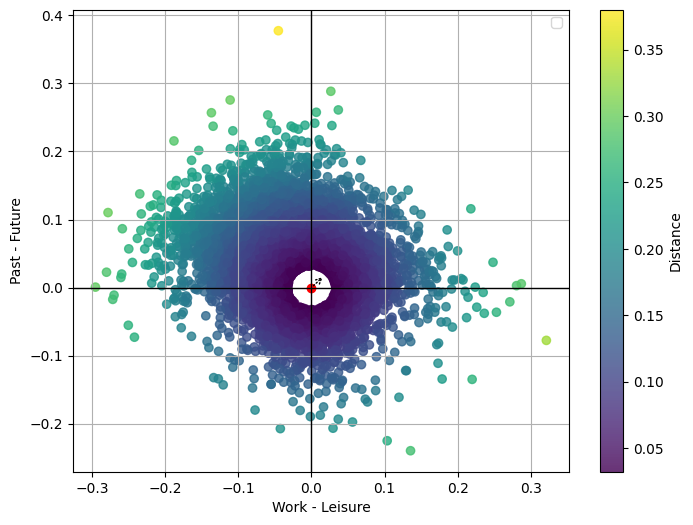

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


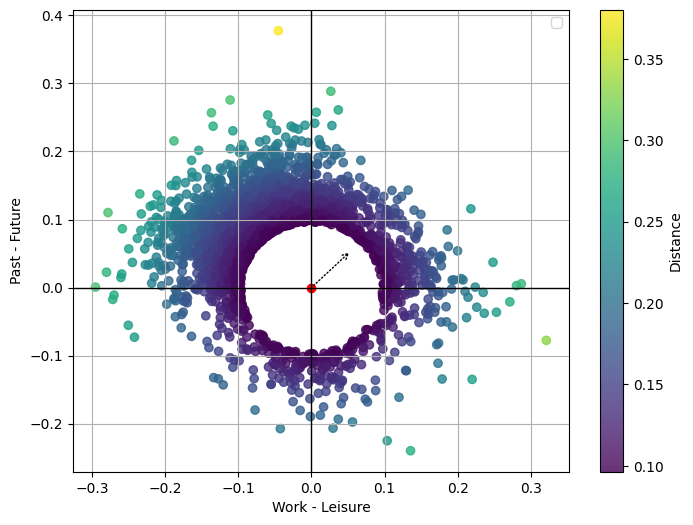

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


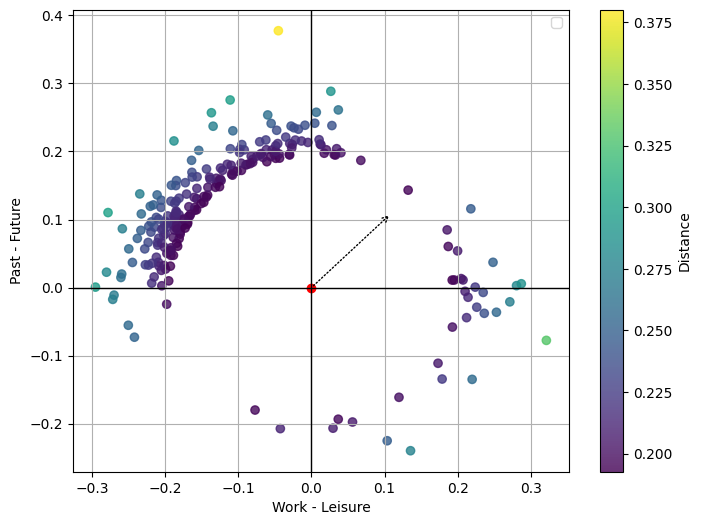

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


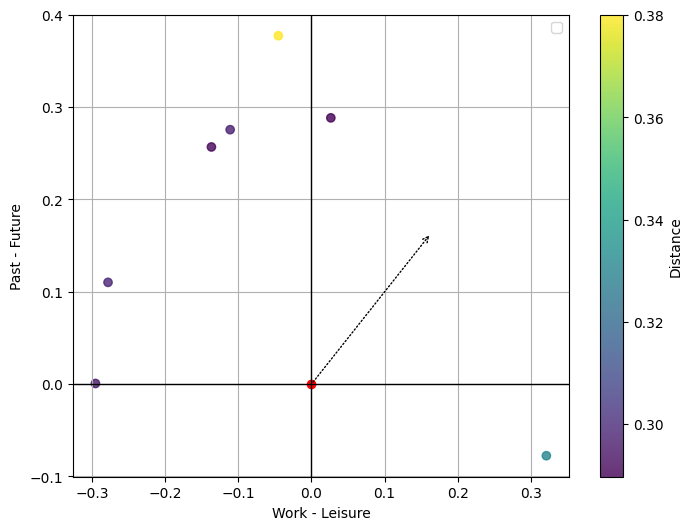

In [22]:
import matplotlib.pyplot as plt
import numpy as np




for value in [0.1, 0.3, 0.6, 0.9]:
    circle_radius = max(x_values) * value

    df_bourdieu_fig = df_bourdieu[df_bourdieu['distance'] >= circle_radius]
    #df_bourdieu_fig = df_bourdieu.copy()

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df_bourdieu_fig['leisure_work'], df_bourdieu_fig['future_past'], c=df_bourdieu_fig['distance'], cmap='viridis', alpha=0.8)
    plt.colorbar(label='Distance')

    # Add the center point
    plt.scatter(0, 0, color='red')

    # Add an arrow from the center to the edge of the circle
    angle = np.deg2rad(45)  # Convert 45 degrees to radians
    dx = circle_radius*0.8 * np.cos(angle)  # Change in x
    dy = circle_radius*0.8 * np.sin(angle)  # Change in y

    #plt.arrow(0, 0, dx, dy, head_width=0.05 * circle_radius, head_length=0.1 * circle_radius, fc='black', ec='black')

    # Replacing plt.arrow with plt.annotate to create a dotted arrow
    plt.annotate('', xy=(dx, dy), xytext=(0, 0),
                arrowprops=dict(arrowstyle="->", color='black', linestyle='dotted'))

    plt.axvline(x=0, color='black', linewidth=1)  # Draw a vertical line at x=0
    plt.axhline(y=0, color='black', linewidth=1)  # Draw a vertical line at x=0


    plt.xlabel('Work - Leisure')
    plt.ylabel('Past - Future')
    plt.title('')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'results/radius_optimisation/{str(value)}.png')
    plt.show()

### Look based on tokens

In [23]:
df_bourdieu[df_bourdieu['len_content']<=300]['len_content']

0       58
1       38
2       61
3       17
4       30
        ..
9321    15
9322    16
9323    14
9324    32
9325     5
Name: len_content, Length: 8868, dtype: int64

/tmp/ipykernel_1882975/3584013475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bourdieu_token['len_content_bins'] = pd.qcut(df_bourdieu_token['len_content'], q = 10)


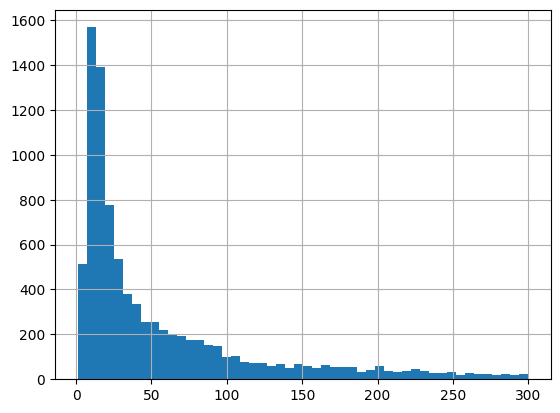

/tmp/ipykernel_1882975/2262199927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bourdieu_token['len_content_bins'] = pd.qcut(df_bourdieu_token['len_content'], q = 10)


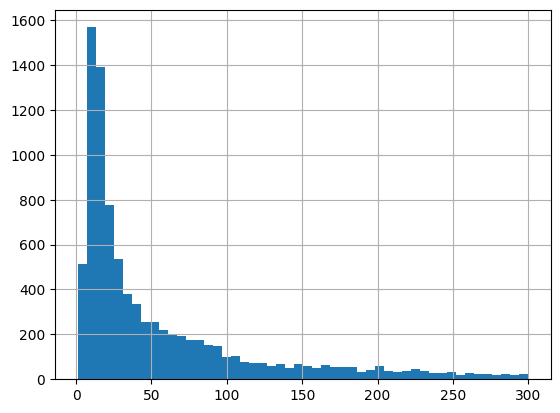

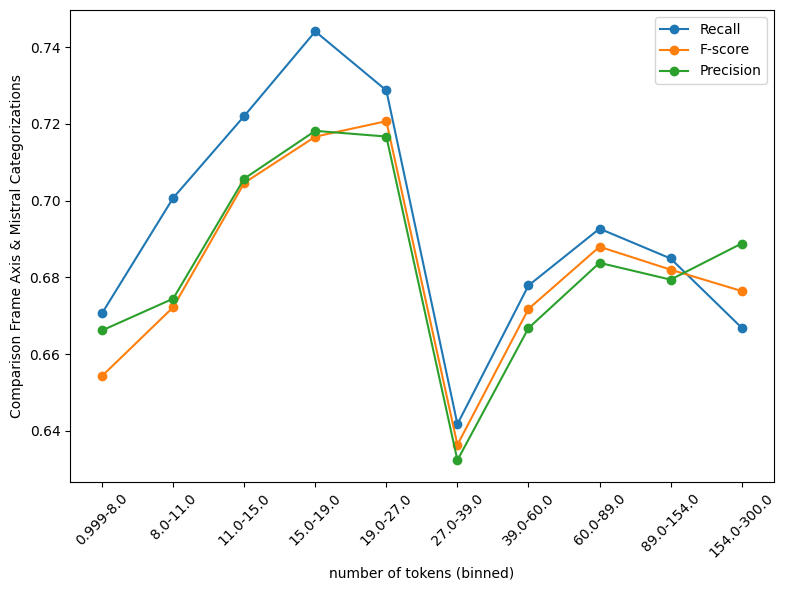

In [38]:
df_bourdieu_token = df_bourdieu[df_bourdieu['len_content']<=300]
df_bourdieu_token['len_content'].hist(bins = 50)

df_bourdieu_token['len_content_bins'] = pd.qcut(df_bourdieu_token['len_content'], q = 10)
df_bourdieu_token = df_bourdieu_token.sort_values('len_content_bins')


import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

list_accuracy = []
list_recall = []
list_fscore = []
list_precision = []
radius_distance = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#radius_distance = [0.1]
circle_radius_list = []
list_n_doc = []


tokens_list = df_bourdieu_token['len_content_bins'].unique()
tokens_list_figure = [str(x.left) + "-" + str(x.right) for x in tokens_list]


for rad in tokens_list:

    df_bourdieu_1 = df_bourdieu_token[df_bourdieu_token['len_content_bins'] == rad]
    #df_bourdieu_1 = df_bourdieu.copy()
    #df_bourdieu_1['category_1'][df_bourdieu_1['distance']> circle_radius] = 'None'
    

    df_bourdieu_1 = pd.merge(df_bourdieu_1, test_2[['doc_id', 'category_2_model']], on='doc_id')
    df_bourdieu_1 = df_bourdieu_1[df_bourdieu_1['category_2']!='None']
    df_bourdieu_1 = df_bourdieu_1[df_bourdieu_1['category_2_model']!='None']

    list_n_doc.append(len(df_bourdieu_1))

    y = list(df_bourdieu_1['category_2'])
    y_pred = list(df_bourdieu_1['category_2_model'])

    #acc = accuracy_score(y, y_pred)
    #list_accuracy.append(acc)

    report = classification_report(y, y_pred, output_dict=True)
    #list_accuracy.append(report['macro avg'])
    list_recall.append(report['macro avg']['recall'])
    list_fscore.append(report['macro avg']['f1-score'])
    list_precision.append(report['macro avg']['precision'])

# Now list_accuracy, list_recall, and list_fscore contain accuracy, recall, and F-score respectively for each radius_distance value.

import matplotlib.pyplot as plt

# Assuming you have imported your data into a DataFrame called 'data'

# Plotting
plt.figure(figsize=(8, 6))
#plt.plot(tokens_list_figure, list_accuracy, marker='o', linestyle='-', label='Accuracy')
plt.plot(tokens_list_figure, list_recall, marker='o', linestyle='-', label='Recall')
plt.plot(tokens_list_figure, list_fscore, marker='o', linestyle='-', label='F-score')
plt.plot(tokens_list_figure, list_precision, marker='o', linestyle='-', label='Precision')

plt.xticks(rotation=45)
plt.xlabel('number of tokens (binned)')
plt.ylabel('Comparison Frame Axis & Mistral Categorizations')
plt.title('')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('results/tokens_future_past.png')
plt.show()

/tmp/ipykernel_1882975/2325597005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bourdieu_token['len_content_bins'] = pd.qcut(df_bourdieu_token['len_content'], q = 10)


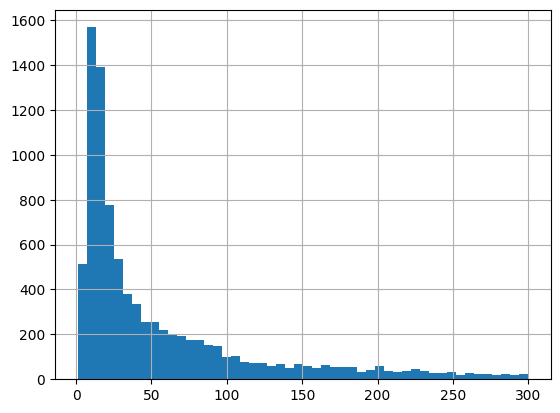

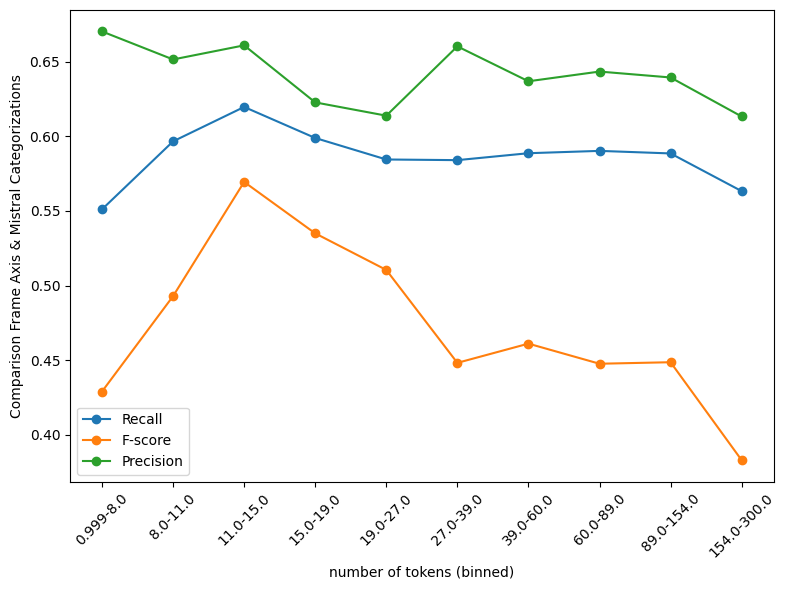

In [37]:
df_bourdieu_token = df_bourdieu[df_bourdieu['len_content']<=300]
df_bourdieu_token['len_content'].hist(bins = 50)

df_bourdieu_token['len_content_bins'] = pd.qcut(df_bourdieu_token['len_content'], q = 10)
df_bourdieu_token = df_bourdieu_token.sort_values('len_content_bins')


import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

list_accuracy = []
list_recall = []
list_fscore = []
list_precision = []
radius_distance = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#radius_distance = [0.1]
circle_radius_list = []
list_n_doc = []


tokens_list = df_bourdieu_token['len_content_bins'].unique()
tokens_list_figure = [str(x.left) + "-" + str(x.right) for x in tokens_list]


for rad in tokens_list:

    df_bourdieu_1 = df_bourdieu_token[df_bourdieu_token['len_content_bins'] == rad]
    #df_bourdieu_1 = df_bourdieu.copy()
    #df_bourdieu_1['category_1'][df_bourdieu_1['distance']> circle_radius] = 'None'
    

    df_bourdieu_1 = pd.merge(df_bourdieu_1, test[['doc_id', 'category_1_model']], on='doc_id')
    df_bourdieu_1 = df_bourdieu_1[df_bourdieu_1['category_1']!='None']
    df_bourdieu_1 = df_bourdieu_1[df_bourdieu_1['category_1_model']!='None']

    list_n_doc.append(len(df_bourdieu_1))

    y = list(df_bourdieu_1['category_1'])
    y_pred = list(df_bourdieu_1['category_1_model'])

    #acc = accuracy_score(y, y_pred)
    #list_accuracy.append(acc)

    report = classification_report(y, y_pred, output_dict=True)
    #list_accuracy.append(report['macro avg'])
    list_recall.append(report['macro avg']['recall'])
    list_fscore.append(report['macro avg']['f1-score'])
    list_precision.append(report['macro avg']['precision'])

# Now list_accuracy, list_recall, and list_fscore contain accuracy, recall, and F-score respectively for each radius_distance value.

import matplotlib.pyplot as plt

# Assuming you have imported your data into a DataFrame called 'data'

# Plotting
plt.figure(figsize=(8, 6))
#plt.plot(tokens_list_figure, list_accuracy, marker='o', linestyle='-', label='Accuracy')
plt.plot(tokens_list_figure, list_recall, marker='o', linestyle='-', label='Recall')
plt.plot(tokens_list_figure, list_fscore, marker='o', linestyle='-', label='F-score')
plt.plot(tokens_list_figure, list_precision, marker='o', linestyle='-', label='Precision')

plt.xticks(rotation=45)
plt.xlabel('number of tokens (binned)')
plt.ylabel('Comparison Frame Axis & Mistral Categorizations')
plt.title('')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('results/tokens_work_leisure.png')
plt.show()

In [39]:
y = list(df_bourdieu_1['category_2'])
y_pred = list(df_bourdieu_1['category_2_model'])

#acc = accuracy_score(y, y_pred)
#list_accuracy.append(acc)

print(classification_report(y, y_pred, output_dict=False))

              precision    recall  f1-score   support

      future       0.89      0.91      0.90       349
        past       0.49      0.42      0.45        71

    accuracy                           0.83       420
   macro avg       0.69      0.67      0.68       420
weighted avg       0.82      0.83      0.82       420



In [41]:
classification_report(y, y_pred, output_dict=True)['accuracy']


0.8285714285714286

In [42]:
print(classification_report(y, y_pred, output_dict=False))

              precision    recall  f1-score   support

      future       0.89      0.91      0.90       349
        past       0.49      0.42      0.45        71

    accuracy                           0.83       420
   macro avg       0.69      0.67      0.68       420
weighted avg       0.82      0.83      0.82       420

